# Data Exploration

In [10]:
import pandas as pd
from termcolor import cprint


data = pd.read_csv('data/data_nasabah.csv', delimiter=';')

# Jumlah data (baris dan kolom)
cprint(f"Jumlah data (baris, kolom): {data.shape}", "green")

# Informasi tentang tipe data dan skema pengkodean
cprint("\nInformasi tipe data dan skema pengkodean:", "green")
print(data.info())

# Statistik deskriptif untuk data numerik
cprint("\nStatistik deskriptif untuk data numerik:", "green")
print(data.describe())

# Melihat beberapa baris pertama dari data
cprint("\nBeberapa baris pertama dari data:", "green")
print(data.head())

# Melakukan pengkodean untuk kolom kategorikal
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-Laki': 1, 'Perempuan': 2})
data['jenis_produk'] = data['jenis_produk'].map({'tabungan': 1, 'kartu_kredit': 2, 'deposito': 3})
data['pengguna_mobile_banking'] = data['pengguna_mobile_banking'].map({'YA':1, 'TIDAK': 2})
cprint(f"\nData setelah pengkodean kolom :", "green")
print(data.head())

# Menampilkan jumlah nilai unik untuk setiap kolom (untuk memahami kategori)
cprint("\nJumlah nilai unik untuk setiap kolom:", "green")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

Jumlah data (baris, kolom): (100, 10)

Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   nasabah_id                 100 non-null    object
 1   umur                       100 non-null    int64 
 2   jenis_kelamin              100 non-null    object
 3   pendapatan                 100 non-null    int64 
 4   saldo_rata_rata            100 non-null    int64 
 5   jumlah_transaksi           100 non-null    int64 
 6   jenis_produk               100 non-null    object
 7   frekuensi_kunjungi_cabang  100 non-null    int64 
 8   pengguna_mobile_banking    100 non-null    object
 9   skor_kredit                100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB
None

Statistik deskriptif untuk data numerik:
             umur    pendapatan  saldo_rata_rata  jumlah_t

2. Data Exploration / Eksplorasi Data

Lima baris pertama dari data:
  nasabah_id  umur jenis_kelamin  pendapatan  saldo_rata_rata  \
0       N001    22     Perempuan     5800000          1508000   
1       N002    64     Perempuan     5700000          1254000   
2       N003    27     Perempuan     2950000           590000   
3       N004    34     Perempuan     3100000           186000   
4       N005    45     Laki-Laki     6700000          1474000   

   jumlah_transaksi  jenis_produk  frekuensi_kunjungi_cabang  \
0                19      tabungan                          1   
1                 9  kartu_kredit                          2   
2                12      tabungan                          1   
3                16      deposito                          5   
4                15  kartu_kredit                          3   

  pengguna_mobile_banking  skor_kredit  
0                   TIDAK          900  
1                   TIDAK          900  
2                      YA          500  
3                   TIDAK     

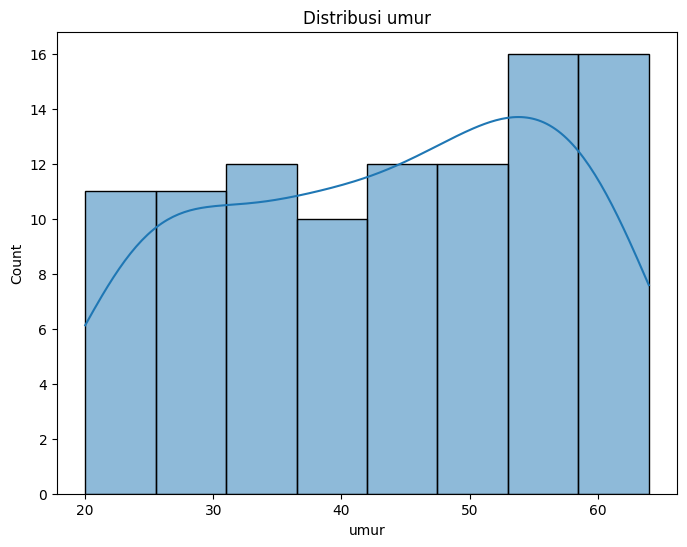

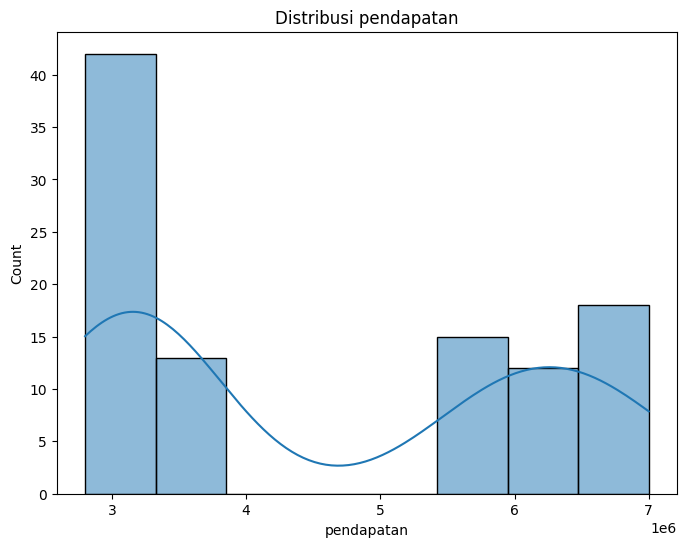

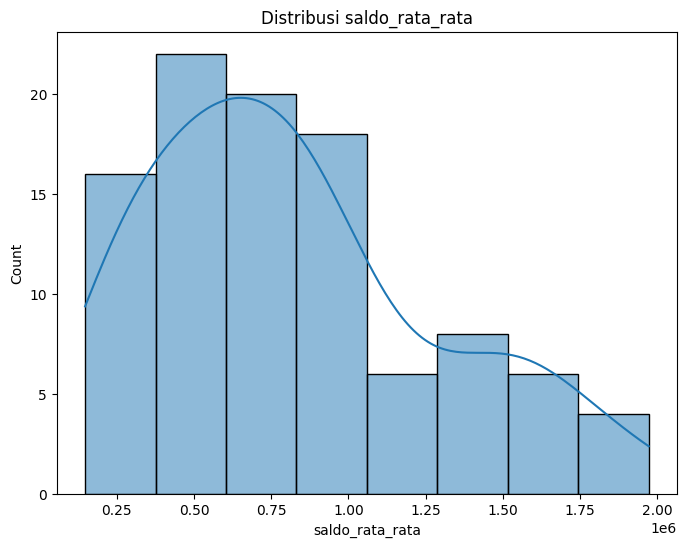

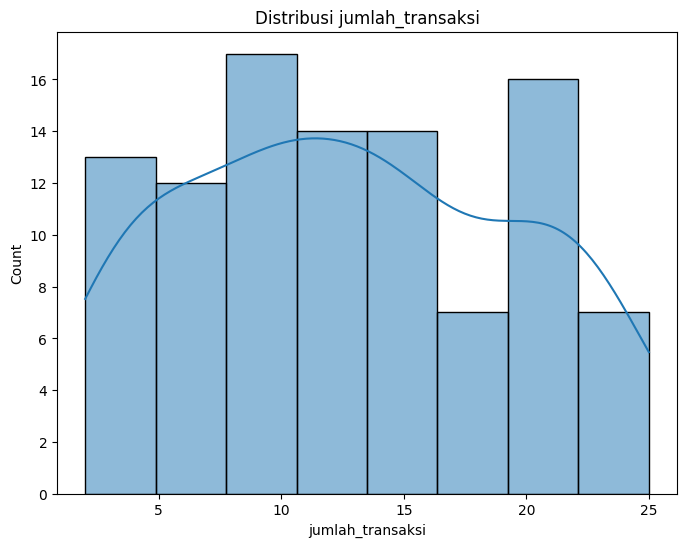

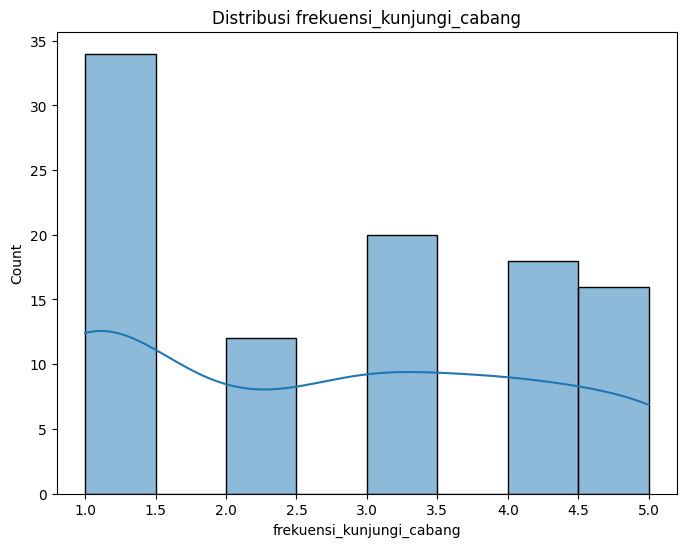

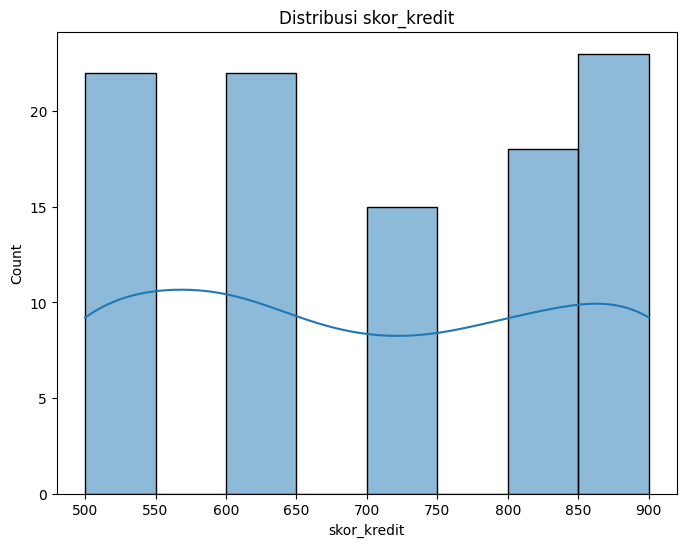


Analisis Korelasi Antara Variabel Numerik:


<Axes: >

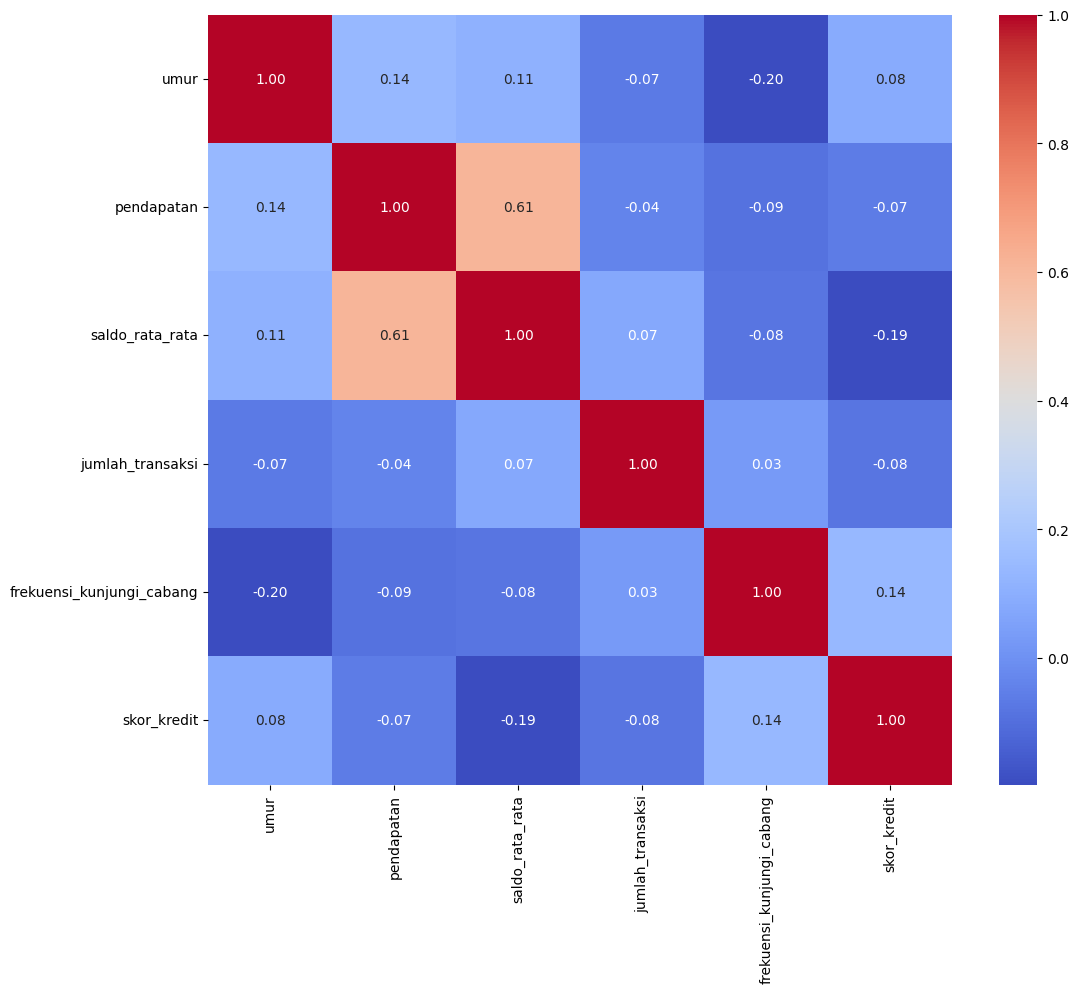

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/data_nasabah.csv', delimiter=';')

cprint('Lima baris pertama dari data:', 'green')
print(data.head())

cprint('\nInformasi tentang data:', 'green')
print(data.info())

cprint('\nStatistik deskriptif untuk data numerik:', 'green')
print(data.describe())

cprint('\nMenampilkan jumlah nilai unik untuk setiap kolom (Untuk memahami kategori)', 'green')
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

# Analisis Distribusi Data Numerik
cprint('\nAnalisis Distribusi Data Numerik:', 'green')
numerical_features = data.select_dtypes(include=['number'])
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

# Analisis Korelasi Anatar Variabel Numerik
cprint('\nAnalisis Korelasi Antara Variabel Numerik:', 'green')
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr() # Calculate correlation on numerical data only
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')